![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

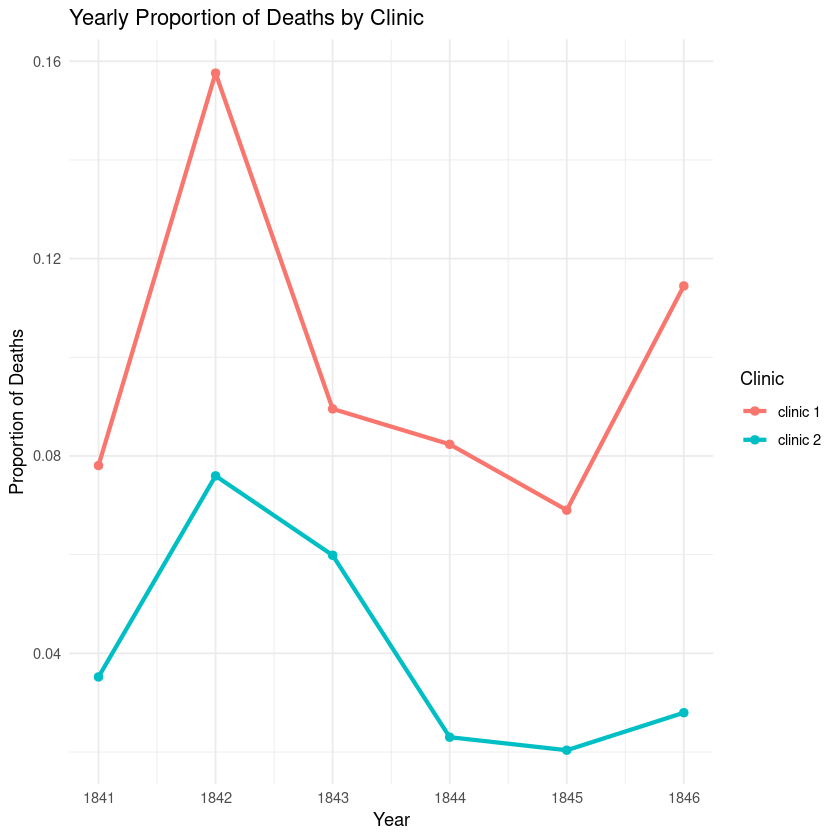


**Mean Mortality Rates Before and After Handwashing:**
# A tibble: 2 × 2
  handwashing_started avg_mortality
  <lgl>                       <dbl>
1 FALSE                      0.105 
2 TRUE                       0.0211

Covariance between Handwashing and Mortality Rate: -0.014767 

Pearson Correlation between Handwashing and Mortality Rate: -0.490278 

**Welch Two Sample t-Test Results:**

	Welch Two Sample t-test

data:  proportion_deaths by handwashing_started
t = 9.6101, df = 92.435, p-value = 1.445e-15
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.06660662 0.10130659
sample estimates:
mean in group FALSE  mean in group TRUE 
         0.10504998          0.02109338 


**Linear Regression Summary:**

Call:
lm(formula = proportion_deaths ~ handwashing_started, data = monthly)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099814 -0.046056  0.000119  0.028701  0.208758 

Coeffic

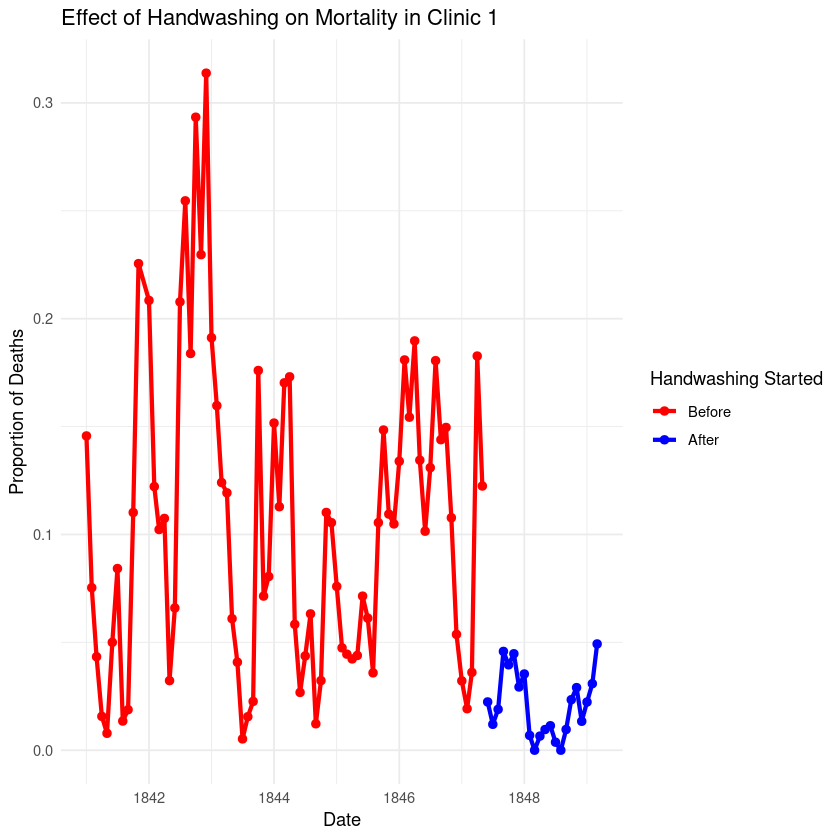

In [16]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(effsize)  # For Cohen's d

# Load datasets
yearly <- read.csv("data/yearly_deaths_by_clinic.csv")
monthly <- read.csv("data/monthly_deaths.csv")

# Convert date column to Date format
monthly <- monthly %>%
  mutate(date = as.Date(date))

# Compute proportion of deaths
yearly <- yearly %>%
  mutate(proportion_deaths = deaths / births)

monthly <- monthly %>%
  mutate(proportion_deaths = deaths / births)

# Define handwashing introduction date
handwashing_start <- as.Date("1847-06-01")

# Add binary indicator for handwashing introduction
monthly <- monthly %>%
  mutate(handwashing_started = date >= handwashing_start)

# Plot yearly mortality proportion by clinic
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "Yearly Proportion of Deaths by Clinic",
    x = "Year",
    y = "Proportion of Deaths",
    color = "Clinic"
  ) +
  theme_minimal()

# Plot monthly mortality proportions before and after handwashing
ggplot(monthly, aes(x = date, y = proportion_deaths, color = handwashing_started)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  scale_color_manual(values = c("red", "blue"), labels = c("Before", "After")) +
  labs(
    title = "Effect of Handwashing on Mortality in Clinic 1",
    x = "Date",
    y = "Proportion of Deaths",
    color = "Handwashing Started"
  ) +
  theme_minimal()

# Compute mean mortality before and after handwashing
monthly_summary <- monthly %>%
  group_by(handwashing_started) %>%
  summarise(avg_mortality = mean(proportion_deaths))

# Print formatted summary
cat("\n**Mean Mortality Rates Before and After Handwashing:**\n")
print(monthly_summary)

# Calculate and display covariance
cov_value <- cov(monthly$handwashing_started, monthly$proportion_deaths)
cat("\nCovariance between Handwashing and Mortality Rate:", round(cov_value, 6), "\n")

# Calculate and display correlation coefficient
cor_value <- cor(monthly$handwashing_started, monthly$proportion_deaths, method = "pearson")
cat("\nPearson Correlation between Handwashing and Mortality Rate:", round(cor_value, 6), "\n")

# Perform Welch's t-test
t_test_result <- t.test(proportion_deaths ~ handwashing_started, data = monthly, var.equal = FALSE)
cat("\n**Welch Two Sample t-Test Results:**\n")
print(t_test_result)

# Linear regression analysis
model <- lm(proportion_deaths ~ handwashing_started, data = monthly)
cat("\n**Linear Regression Summary:**\n")
print(summary(model))

# Cohen's d for effect size
cohen_d_result <- cohen.d(
  monthly$proportion_deaths[monthly$handwashing_started == TRUE],
  monthly$proportion_deaths[monthly$handwashing_started == FALSE]
)

cat("\n**Cohen's d Effect Size:**\n")
print(cohen_d_result)